# Predicting Heart Disease

Image

Author: Xiaohua Su

Date: May 17th, 2022

# Overview

As of 2020, heart disease is the leading cause of death in the US, with the disease claiming close to 700,000 that year. It is the leading cause of death regardless of gender and for most race/ethnicity. This disease can lead to early death in individuals, increase medicial visits and a lost of productivity in our economy. As such, it is important to try to address this.


# Business Problem

With how prevalent heart disease is in the nation, it is important for doctors to discuss with their patients about early prevention. In order to do this, doctors would need to know more about a patient’s history in order to diagnose them with having heart disease, potentially requiring blood work in addition. Getting the results from the blood work usually happens after the patient’s is already out of the doctor’s office. Calls will then be made to discuss these results and potential follow up appointments will be made. 

Our model aims to predict whether a patient, who comes into a doctor’s office/hospital, has heart disease. By being able to predict if the patient has heart disease or not, we can then flag this patient for the doctor electronically. Instead of having to waiting for a phone call for a discussion on, that may not be between the patient and doctor, conversation between the doctor and patient about managing heart disease can begin. This flagging can help start the conversation between the doctor and patient about early prevention steps that can be made and can help lead the doctor in asking certain questions for further verification and testing.

# Data

The data was taken from the [CDC's 2020 Behavorial Risk Factor Surveillance System](https://www.cdc.gov/brfss/annual_data/annual_2020.html) (BRFSS). Due to how large the data is, this data was not uploaded to the github but can be found where the data was taken underneath the data files section.

It is a survey data performed between 2020 to 2021 from the CDC to monitor people's health-behavior, chronic health conditions, and use of services to help manage their disease. The data contains information of the individual such as `race` and `gender` that we will not use to avoid these biases in our models. A new column was created as the data does not specifically have a column called heart disease but instead has two two columns called `cvdinfr4` and `cvdcrhd4` that corresponded with whether the individual was ever told/diagnose with having a heart attack and told that they had coronary heart disease. Both questions, get at the issue of heart disease.

# Imports and Loading in Data 

In [1]:
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, \
ExtraTreesClassifier, VotingClassifier, StackingRegressor
from sklearn.metrics import plot_confusion_matrix, recall_score,\
    accuracy_score, precision_score, f1_score, roc_auc_score, plot_roc_curve
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.pipeline import Pipeline


from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline


from impyute.imputation.cs import mice
from model import *

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
heart_df = pd.read_csv('./Data/heart_df.csv')

In [4]:
heart_df

,Unnamed: 0,state,general_health,physical_health,mental_health,health_insurance,health_care_doctors,no_doc_bc_cost,last_checkup,excercise_30,sleep,stroke,asthma,skin_cancer,other_cancer,copd_type_issue,arthritis_anyform,depressive_disorder,kidney_disease,diabetes,education_lvl,rent_own,employment_status,income_level,weight_kg,height_m,difficulty_walking,smoke100_lifetime,smokeless_tobacco_products,alcohol_consumption_30,high_risk_situations,ecigaret,heart_disease
0,0,1.0,2.0,3.0,30.0,2.0,3.0,1.0,4.0,1.0,5.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,6.0,1.0,4.0,1.0,48.0,170.0,2.0,1.0,3.0,0.0,2.0,1.0,0.0
1,1,1.0,3.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,7.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,6.0,1.0,7.0,NaN,NaN,163.0,2.0,NaN,NaN,NaN,NaN,NaN,0.0
2,2,1.0,3.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,7.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,3.0,5.0,1.0,7.0,7.0,NaN,173.0,2.0,2.0,3.0,0.0,2.0,2.0,0.0
3,3,1.0,1.0,0.0,0.0,1.0,3.0,2.0,2.0,2.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,4.0,1.0,5.0,NaN,NaN,NaN,2.0,2.0,3.0,0.0,2.0,2.0,0.0
4,4,1.0,2.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,7.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,6.0,2.0,7.0,NaN,57.0,168.0,2.0,2.0,3.0,0.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397142,401953,72.0,3.0,0.0,0.0,2.0,1.0,2.0,2.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,3.0,5.0,1.0,1.0,NaN,55.0,150.0,2.0,2.0,3.0,0.0,2.0,NaN,0.0
397143,401954,72.0,3.0,0.0,0.0,1.0,1.0,2.0,3.0,2.0,12.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,5.0,4.0,76.0,152.0,2.0,2.0,3.0,0.0,2.0,NaN,0.0
397144,401955,72.0,3.0,0.0,0.0,1.0,1.0,2.0,2.0,1.0,8.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,4.0,1.0,5.0,1.0,72.0,124.0,2.0,2.0,3.0,0.0,2.0,NaN,0.0
397145,401956,72.0,3.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,6.0,1.0,1.0,NaN,80.0,173.0,2.0,7.0,3.0,4.0,2.0,NaN,0.0


In [5]:
heart_df.drop(columns = 'Unnamed: 0', inplace = True)

In [6]:
heart_df

,state,general_health,physical_health,mental_health,health_insurance,health_care_doctors,no_doc_bc_cost,last_checkup,excercise_30,sleep,stroke,asthma,skin_cancer,other_cancer,copd_type_issue,arthritis_anyform,depressive_disorder,kidney_disease,diabetes,education_lvl,rent_own,employment_status,income_level,weight_kg,height_m,difficulty_walking,smoke100_lifetime,smokeless_tobacco_products,alcohol_consumption_30,high_risk_situations,ecigaret,heart_disease
0,1.0,2.0,3.0,30.0,2.0,3.0,1.0,4.0,1.0,5.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,6.0,1.0,4.0,1.0,48.0,170.0,2.0,1.0,3.0,0.0,2.0,1.0,0.0
1,1.0,3.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,7.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,6.0,1.0,7.0,NaN,NaN,163.0,2.0,NaN,NaN,NaN,NaN,NaN,0.0
2,1.0,3.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,7.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,3.0,5.0,1.0,7.0,7.0,NaN,173.0,2.0,2.0,3.0,0.0,2.0,2.0,0.0
3,1.0,1.0,0.0,0.0,1.0,3.0,2.0,2.0,2.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,4.0,1.0,5.0,NaN,NaN,NaN,2.0,2.0,3.0,0.0,2.0,2.0,0.0
4,1.0,2.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,7.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,6.0,2.0,7.0,NaN,57.0,168.0,2.0,2.0,3.0,0.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397142,72.0,3.0,0.0,0.0,2.0,1.0,2.0,2.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,3.0,5.0,1.0,1.0,NaN,55.0,150.0,2.0,2.0,3.0,0.0,2.0,NaN,0.0
397143,72.0,3.0,0.0,0.0,1.0,1.0,2.0,3.0,2.0,12.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,5.0,4.0,76.0,152.0,2.0,2.0,3.0,0.0,2.0,NaN,0.0
397144,72.0,3.0,0.0,0.0,1.0,1.0,2.0,2.0,1.0,8.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,4.0,1.0,5.0,1.0,72.0,124.0,2.0,2.0,3.0,0.0,2.0,NaN,0.0
397145,72.0,3.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,6.0,1.0,1.0,NaN,80.0,173.0,2.0,7.0,3.0,4.0,2.0,NaN,0.0


In [7]:
heart_df.drop(columns = ['education_lvl', 'income_level', 'employment_status', 'rent_own', 'health_care_doctors', \
                         'no_doc_bc_cost'], inplace = True)

In [8]:
X = heart_df.drop(columns = ['heart_disease', 'state'])
y = heart_df.heart_disease

# Preprocessing and Model Prep

In [9]:
#train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y , random_state = 42)

In [10]:
y_train.value_counts(normalize = True)

0.0    0.917102
1.0    0.082898
Name: heart_disease, dtype: float64

Our target is heavily imbalance. As such I will need to SMOTE and use the imblearn version of pipelines. I will smote up to 15%. 

#### Column Transformers

column transformer Pipelines will be built to prevent data leakage when we are doing cross validation as we need to scale and one-hot-encode our features. Different column transformers will be made as we will see how our model does with different amount of features.

In [11]:
X_train

,general_health,physical_health,mental_health,health_insurance,last_checkup,excercise_30,sleep,stroke,asthma,skin_cancer,other_cancer,copd_type_issue,arthritis_anyform,depressive_disorder,kidney_disease,diabetes,weight_kg,height_m,difficulty_walking,smoke100_lifetime,smokeless_tobacco_products,alcohol_consumption_30,high_risk_situations,ecigaret
147150,3.0,0.0,2.0,1.0,1.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,86.0,168.0,2.0,2.0,3.0,0.0,2.0,2.0
95377,1.0,0.0,0.0,1.0,1.0,2.0,8.0,1.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,80.0,152.0,2.0,2.0,3.0,3.0,2.0,2.0
100216,3.0,0.0,0.0,2.0,2.0,1.0,8.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,91.0,175.0,2.0,1.0,3.0,4.0,2.0,1.0
376829,3.0,2.0,0.0,1.0,4.0,1.0,4.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0,64.0,168.0,2.0,1.0,1.0,9.0,2.0,2.0
197380,3.0,0.0,NaN,1.0,1.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,62.0,173.0,2.0,2.0,3.0,17.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15342,3.0,0.0,0.0,NaN,3.0,2.0,8.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,91.0,163.0,2.0,2.0,3.0,20.0,2.0,NaN
275755,1.0,0.0,2.0,1.0,1.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,160.0,2.0,2.0,3.0,0.0,2.0,2.0
219795,1.0,0.0,0.0,1.0,1.0,1.0,8.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,86.0,185.0,2.0,2.0,3.0,0.0,2.0,2.0
41423,1.0,0.0,2.0,1.0,1.0,1.0,8.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,75.0,170.0,2.0,2.0,3.0,3.0,2.0,2.0


In [38]:
X_train.physical_health.value_counts()

0.0     207250
30.0     18206
2.0      13193
1.0       9250
3.0       7663
5.0       6736
10.0      4949
15.0      4598
7.0       4214
4.0       4065
20.0      2993
14.0      2610
6.0       1147
25.0      1043
8.0        861
21.0       599
12.0       566
28.0       415
29.0       197
9.0        164
18.0       152
16.0       125
27.0       116
17.0        95
11.0        88
13.0        81
22.0        78
24.0        63
26.0        50
23.0        47
19.0        31
Name: physical_health, dtype: int64

In [12]:
continous = ['physical_health', 'mental_health', 'last_checkup' , 'excercise_30', 'sleep', 'weight_kg', \
               'height_m', 'alcohol_consumption_30']

categorical = list(X.columns.drop(continous))

In [13]:
categorical

['general_health',
 'health_insurance',
 'stroke',
 'asthma',
 'skin_cancer',
 'other_cancer',
 'copd_type_issue',
 'arthritis_anyform',
 'depressive_disorder',
 'kidney_disease',
 'diabetes',
 'difficulty_walking',
 'smoke100_lifetime',
 'smokeless_tobacco_products',
 'high_risk_situations',
 'ecigaret']

In [14]:
cat_pipe = Pipeline(steps=[('cat_impute', IterativeImputer(random_state=42, max_iter = 5)),
                              ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))])
scale_pipe = Pipeline(steps=[('scale_impute', IterativeImputer(random_state=42)),
                              ('scale', StandardScaler())])

In [15]:
#ct for only continous
ct_scaled = ColumnTransformer(transformers=[
    ('scale', scale_pipe, continous)
])

#ct for categorical only
ct_categorical = ColumnTransformer(transformers=[
    ('cat', cat_pipe, categorical),
])

#ct with both continous and categorical
ct = ColumnTransformer(transformers=[
    ('cat', cat_pipe, categorical),
    ('scale', scale_pipe, continous)
])

In [16]:
#simple
simple_pipe = Pipeline(steps=[('cat_impute', SimpleImputer(strategy='most_frequent')),
                              ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))])
simple_ct = ColumnTransformer(transformers=[
    ('cat', simple_pipe, categorical),
])

# Simple Models

## Dummy Classifier

In [17]:
X_simple = X_train[continous]
y_simple = y_train

X_simple

,physical_health,mental_health,last_checkup,excercise_30,sleep,weight_kg,height_m,alcohol_consumption_30
147150,0.0,2.0,1.0,1.0,6.0,86.0,168.0,0.0
95377,0.0,0.0,1.0,2.0,8.0,80.0,152.0,3.0
100216,0.0,0.0,2.0,1.0,8.0,91.0,175.0,4.0
376829,2.0,0.0,4.0,1.0,4.0,64.0,168.0,9.0
197380,0.0,NaN,1.0,1.0,6.0,62.0,173.0,17.0
...,...,...,...,...,...,...,...,...
15342,0.0,0.0,3.0,2.0,8.0,91.0,163.0,20.0
275755,0.0,2.0,1.0,1.0,6.0,NaN,160.0,0.0
219795,0.0,0.0,1.0,1.0,8.0,86.0,185.0,0.0
41423,0.0,2.0,1.0,1.0,8.0,75.0,170.0,3.0


In [18]:
dummy_simple = ImPipeline(steps=[
    ('ct', ct_scaled),
    ('sm', SMOTE(sampling_strategy= 0.15, random_state=1)),
    ('dummy', DummyClassifier(strategy='most_frequent'))
]).fit(X_simple, y_simple)

In [19]:
dummy_info = ModelWithCV(dummy_simple, 'dummy', X_simple, y_simple)

 
  f1_score is 0.0 CV Results for `dummy` model:
            0.91710 ± 0.00001 accuracy
         <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000001FE89AB0F70> <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x000001FE89AB0A30>


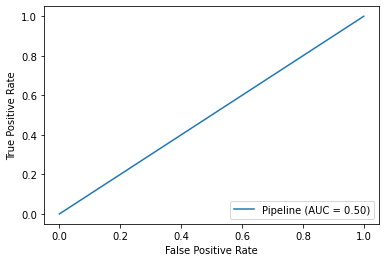

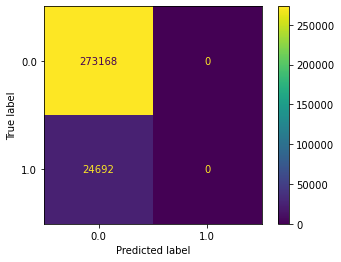

In [20]:
dummy_info.print_summary()

## Baseline Model / Simple Model

In [21]:
X_catergorical = X_train[list(X.columns.drop(continous))]

In [22]:
X_catergorical

,general_health,health_insurance,stroke,asthma,skin_cancer,other_cancer,copd_type_issue,arthritis_anyform,depressive_disorder,kidney_disease,diabetes,difficulty_walking,smoke100_lifetime,smokeless_tobacco_products,high_risk_situations,ecigaret
147150,3.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,3.0,2.0,2.0
95377,1.0,1.0,1.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0
100216,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,1.0,3.0,2.0,1.0
376829,3.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0,2.0,1.0,1.0,2.0,2.0
197380,3.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,3.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15342,3.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,2.0,3.0,2.0,NaN
275755,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0
219795,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,3.0,2.0,2.0
41423,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,3.0,2.0,2.0


In [23]:
y_categorical = y_train

In [24]:
logreg = ImPipeline(steps=[
    ('ct', ct_categorical),
    ('sm', SMOTE(sampling_strategy= 0.15, random_state=1)),
    ('dummy', LogisticRegression(random_state = 42))
]).fit(X_catergorical, y_categorical)

MemoryError: Unable to allocate 65.8 GiB for an array with shape (297860, 29656) and data type float64

In [28]:
#simple imputer works fine....
logreg = ImPipeline(steps=[
    ('ct', simple_ct),
    ('sm', SMOTE(sampling_strategy= 0.15, random_state=1)),
    ('dummy', LogisticRegression(random_state = 42))
]).fit(X_catergorical, y_categorical)

In [31]:
logreg_info = ModelWithCV(logreg, 'dummy', X_catergorical, y_categorical)

C:\Users\xiao\anaconda3\envs\phase5\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\xiao\anaconda3\envs\phase5\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\xiao\anaconda3\envs\phase5\lib\site-packages\imblearn\pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "C:\Users\xiao\anaconda3\envs\phase5\lib\site-packages\sklearn\linear_model\_logistic.py", line 1407, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\xiao\anaconda3\envs\phase5\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\xiao\anaconda3\envs\phase5\lib\site-packages\joblib\

 
  f1_score is 0.24678162277075708 CV Results for `dummy` model:
            nan ± nan accuracy
         <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000001FE89CE1760> <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x000001FE89AEFE50>


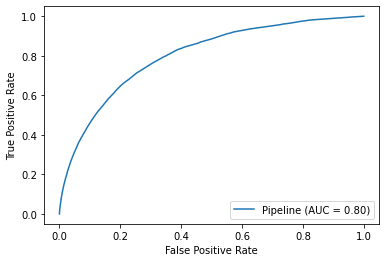

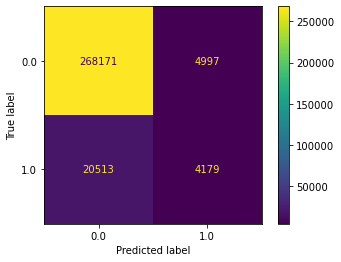

In [32]:
logreg_info.print_summary()

## Simple Model 2 - 

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [34]:
X_catergorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297860 entries, 147150 to 217160
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   general_health              297211 non-null  float64
 1   health_insurance            296344 non-null  float64
 2   stroke                      297317 non-null  float64
 3   asthma                      297108 non-null  float64
 4   skin_cancer                 297164 non-null  float64
 5   other_cancer                297241 non-null  float64
 6   copd_type_issue             296747 non-null  float64
 7   arthritis_anyform           296479 non-null  float64
 8   depressive_disorder         296576 non-null  float64
 9   kidney_disease              296998 non-null  float64
 10  diabetes                    297487 non-null  float64
 11  difficulty_walking          285587 non-null  float64
 12  smoke100_lifetime           284681 non-null  float64
 13  smokeless

In [35]:
cat_pipe = Pipeline(steps=[('cat_impute', IterativeImputer(estimator= RandomForestClassifier(n_estimators=4,
                                                                                             max_depth=10,
                                                                                             bootstrap=True,
                                                                                             max_samples=0.5,
                                                                                             n_jobs=2,
                                                                                             random_state=0) , \
                                                           random_state=42, max_iter = 5)),
                              ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))])

#ct for categorical only
#ct for categorical only
ct_categorical = ColumnTransformer(transformers=[
    ('cat', cat_pipe, categorical),
])


#simple imputer works fine....
logreg = ImPipeline(steps=[
    ('ct', ct_categorical),
    ('sm', SMOTE(sampling_strategy= 0.15, random_state=1)),
    ('dummy', LogisticRegression(random_state = 42))
], verbose= True).fit(X_catergorical, y_categorical)

C:\Users\xiao\anaconda3\envs\phase5\lib\site-packages\sklearn\impute\_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


[Pipeline] ................ (step 1 of 3) Processing ct, total=  35.7s
[Pipeline] ................ (step 2 of 3) Processing sm, total=  13.8s
[Pipeline] ............. (step 3 of 3) Processing dummy, total=   2.1s


In [36]:
cat_pipe2 = Pipeline(steps=[('cat_impute', IterativeImputer(estimator= KNeighborsClassifier() , \
                                                           random_state=42, max_iter = 5)),
                              ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))])

#ct for categorical only
#ct for categorical only
ct_categorical2 = ColumnTransformer(transformers=[
    ('cat', cat_pipe, categorical),
])


#knn MICE works fine....
logreg = ImPipeline(steps=[
    ('ct', ct_categorical2),
    ('sm', SMOTE(sampling_strategy= 0.15, random_state=1)),
    ('dummy', LogisticRegression(random_state = 42))
], verbose= True).fit(X_catergorical, y_categorical)

C:\Users\xiao\anaconda3\envs\phase5\lib\site-packages\sklearn\impute\_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


[Pipeline] ................ (step 1 of 3) Processing ct, total=  36.7s
[Pipeline] ................ (step 2 of 3) Processing sm, total=  14.8s
[Pipeline] ............. (step 3 of 3) Processing dummy, total=   2.1s


In [37]:
cat_pipe3 = Pipeline(steps=[('cat_impute', IterativeImputer(estimator= SVC(), \
                                                           random_state=42, max_iter = 5)),
                              ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))])

#ct for categorical only
#ct for categorical only
ct_categorical3 = ColumnTransformer(transformers=[
    ('cat', cat_pipe, categorical),
])


#simple imputer works fine....
logreg3 = ImPipeline(steps=[
    ('ct', ct_categorical3),
    ('sm', SMOTE(sampling_strategy= 0.15, random_state=1)),
    ('dummy', LogisticRegression(random_state = 42))
], verbose= True).fit(X_catergorical, y_categorical)

C:\Users\xiao\anaconda3\envs\phase5\lib\site-packages\sklearn\impute\_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


[Pipeline] ................ (step 1 of 3) Processing ct, total=  36.7s
[Pipeline] ................ (step 2 of 3) Processing sm, total=  14.9s
[Pipeline] ............. (step 3 of 3) Processing dummy, total=   2.0s


## Simple Model 3 - 